# I - Introduction

Pandas est une bibliothèque de fonctions Python qui permet de faire des statistiques et notamment de traiter des grandes quantités de données.

## I- 1) Installation de la bibliothèque Pandas

La bibliothèque Pandas n'est pas installée par défaut sur EduPython. Pour l'installer, il faut suivre la procédure suivante:
1. Aller dans le menu *Outils/Outils* et choisir *Installation d'un nouveau module*
     * Pour le choix de la méthode d'installation: taper 1 (conda)
     * Pour le choix du module : saisir `pandas` puis valider
     ![image](InstallationModule2.png "Installation du module Pandas")  
2. Une fois l'installation terminée, saisir `import pandas` dans la console EduPython et s'assurer qu'aucune erreur n'apparait


## I - 2) Premiers exemples

La bibliothèque permet de manipuler deux types d'objets: 
* des 'Series': colonnes de données;
* des 'DataFrame': tableaux de données dans lesquels les colonnes sont éventuellement étiquetées

### I - 2) a. Exemple d'objet Series:


Pour indiquer à Python que vous souhaitez utiliser les fonctions de la bibliothèque `pandas` vous devez au préalable saisir dans la console la commande `import pandas`.

In [1]:
import pandas
notes = pandas.Series([7,12,15,18,13.5])
notes

0     7.0
1    12.0
2    15.0
3    18.0
4    13.5
dtype: float64

La colonne de gauche est l' *index* de la série. On peut accéder à un terme de la série de la manière suivante:
    

In [2]:
notes[0]

7.0

In [3]:
notes[2]

15.0

On peut par exemple calculer la moyenne des valeurs:


In [4]:
notes.mean()

13.1

### I - 2) b. Exemple d'objet DataFrame

In [5]:
bulletin = pandas.DataFrame({'math':[12,14,17.5,8.75],'fr':[12,10,9,14],'HG':[14,11,12.5,15]})
bulletin

,HG,fr,math
0,14.0,12,12.00
1,11.0,10,14.00
2,12.5,9,17.50
3,15.0,14,8.75


In [6]:
bulletin['fr']

0    12
1    10
2     9
3    14
Name: fr, dtype: int64

In [7]:
bulletin.loc[2]

HG      12.5
fr       9.0
math    17.5
Name: 2, dtype: float64

In [8]:
bulletin.loc[2,'HG']

12.5

# II - Etude de cas : le titanic

## II - 1) Importation des données

In [9]:
data=pandas.read_csv('titanic.csv', sep = ';')


## II - 2) Analyse du DataFrame 

In [10]:
data.shape

(1309, 6)

In [11]:
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
fare        float64
dtype: object

In [12]:
data.head()

,pclass,survived,name,sex,age,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,211.0
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,152.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,152.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,152.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,152.0


In [13]:
data.count()

pclass      1309
survived    1309
name        1309
sex         1309
age         1046
fare        1308
dtype: int64

In [14]:
data.describe()

,pclass,survived,age,fare
count,1309.000000,1309.000000,1046.000000,1308.000000
mean,2.294882,0.381971,29.897706,33.363150
std,0.837836,0.486055,14.414973,51.751529
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,8.000000
50%,3.000000,0.000000,28.000000,14.000000
75%,3.000000,1.000000,39.000000,31.000000
max,3.000000,1.000000,80.000000,512.000000


## II- 3) Extraire des données

### II-3) a. Extraire une colonne

In [15]:
classe = data['pclass']
classe.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [16]:
sexe=data['sex']
sexe.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [17]:
survivant=data['survived']
survivant.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [18]:
survivant.value_counts()/survivant.count()

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [19]:
data['fare'].sum()

43639.0

###  II - 3) b. Tableaux croisés

In [20]:
pandas.crosstab(data['sex'],data['survived'])

survived,0,1
sex,,
female,127,339
male,682,161


In [21]:
pandas.crosstab(data['sex'],data['survived'],normalize = 'index')

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


In [22]:
pandas.crosstab(data['sex'],data['survived'],normalize = 'columns')

survived,0,1
sex,,
female,0.156984,0.678
male,0.843016,0.322


In [23]:
pandas.crosstab(data['pclass'],data['survived'],normalize = 'index')

survived,0,1
pclass,,
1,0.380805,0.619195
2,0.570397,0.429603
3,0.744711,0.255289


### II- 3) c. Extraction plus ciblée

In [24]:
classe1=data.query('pclass == 1')
classe1.head()

,pclass,survived,name,sex,age,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,211.0
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,152.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,152.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,152.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,152.0


In [25]:
classe1.describe()

,pclass,survived,age,fare
count,323.0,323.000000,284.000000,323.000000
mean,1.0,0.619195,39.165493,87.594427
std,0.0,0.486338,14.546043,80.409972
min,1.0,0.000000,1.000000,0.000000
25%,1.0,0.000000,28.000000,31.000000
50%,1.0,1.000000,39.000000,60.000000
75%,1.0,1.000000,50.000000,107.500000
max,1.0,1.000000,80.000000,512.000000


In [26]:
classe2 = data.query('pclass == 2')
classe2.describe()


,pclass,survived,age,fare
count,277.0,277.000000,261.000000,277.000000
mean,2.0,0.429603,29.517241,21.314079
std,0.0,0.495915,13.632988,13.609949
min,2.0,0.000000,1.000000,0.000000
25%,2.0,0.000000,22.000000,13.000000
50%,2.0,0.000000,29.000000,15.000000
75%,2.0,1.000000,36.000000,26.000000
max,2.0,1.000000,70.000000,74.000000


In [27]:
classe3 = data.query('pclass == 3')
classe3.describe()

,pclass,survived,age,fare
count,709.0,709.000000,501.000000,708.000000
mean,3.0,0.255289,24.842315,13.336158
std,0.0,0.436331,11.975353,11.481613
min,3.0,0.000000,0.000000,0.000000
25%,3.0,0.000000,18.000000,8.000000
50%,3.0,0.000000,24.000000,8.000000
75%,3.0,1.000000,32.000000,15.000000
max,3.0,1.000000,74.000000,70.000000


In [28]:
homme = data.query('sex == "male"') 
homme.describe()

,pclass,survived,age,fare
count,843.000000,843.000000,658.000000,842.000000
mean,2.372479,0.190985,30.607903,26.232779
std,0.811908,0.393310,14.284287,42.488389
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,8.000000
50%,3.000000,0.000000,28.000000,12.000000
75%,3.000000,0.000000,39.000000,27.000000
max,3.000000,1.000000,80.000000,512.000000


In [29]:
femme = data.query('sex == "female"') 
femme.describe()

,pclass,survived,age,fare
count,466.000000,466.000000,388.000000,466.000000
mean,2.154506,0.727468,28.693299,46.246781
std,0.866181,0.445741,14.573391,63.280373
min,1.000000,0.000000,0.000000,7.000000
25%,1.000000,0.000000,19.000000,11.000000
50%,2.000000,1.000000,27.000000,23.000000
75%,3.000000,1.000000,38.000000,55.000000
max,3.000000,1.000000,76.000000,512.000000


In [30]:
mineur = data.query('age <= 18')
mineur.mean()

pclass       2.564767
survived     0.492228
age         10.911917
fare        31.932642
dtype: float64

In [31]:
majeur=data.query('age>18')
majeur.mean()

pclass       2.126612
survived     0.389215
age         34.193435
fare        37.846244
dtype: float64

In [32]:
mineur['survived'].value_counts()/mineur['survived'].count()

0    0.507772
1    0.492228
Name: survived, dtype: float64

## II - 4) Trier les valeurs

In [33]:
data.max()

pclass                                3
survived                              1
name        van Melkebeke, Mr. Philemon
sex                                male
age                                  80
fare                                512
dtype: object

In [34]:
tarif = data.sort_values(by='fare',ascending = False)
tarif.head()

,pclass,survived,name,sex,age,fare
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.0
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.0
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.0
302,1,1,"Ward, Miss. Anna",female,35.0,512.0
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,263.0


In [35]:
age = data.sort_values(by='age',ascending = False)
age.head()

,pclass,survived,name,sex,age,fare
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,79.0
1235,3,0,"Svensson, Mr. Johan",male,74.0,8.0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,50.0
727,3,0,"Connors, Mr. Patrick",male,71.0,8.0


## II- 5) Représentations graphiques

In [36]:
import matplotlib.pyplot as plt

### II- 5) a. Histogrammes

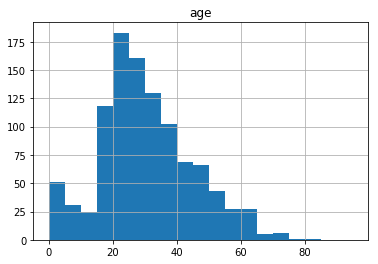

In [37]:
data.hist(column = 'age', bins = range(0,100,5))
plt.show()

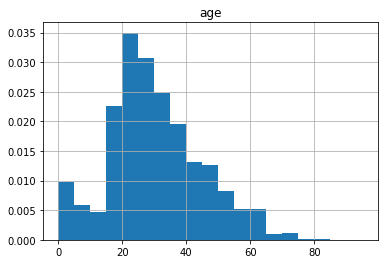

In [38]:
data.hist(column = 'age', bins = range(0,100,5),normed = True)
plt.show()

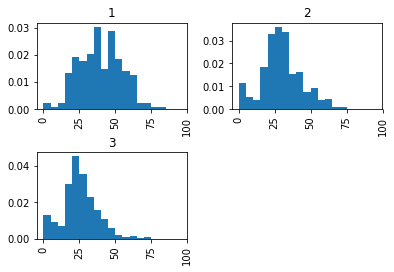

In [39]:
data.hist(column = 'age', bins = range(0,100,5),normed = True,by = 'pclass')
plt.show()

### II- 5) b. Diagrammes en boîtes 

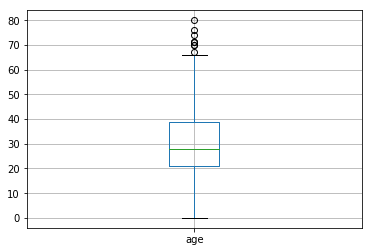

In [40]:
data.boxplot(column='age')
plt.show()

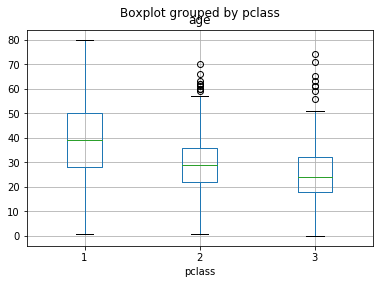

In [41]:
data.boxplot(column='age', by = 'pclass')
plt.show()

### II- 5) c. Nuages de points

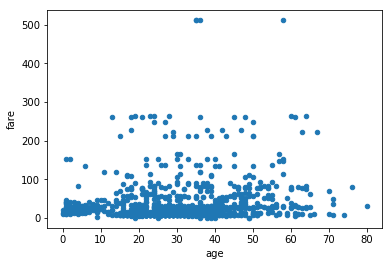

In [42]:
data.plot.scatter(x='age',y='fare')
plt.show()

### II- 5) d. Diagrammes circulaires

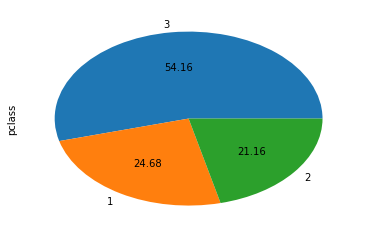

In [43]:
classe = data['pclass'].value_counts()
classe.plot.pie(autopct='%.2f')
plt.show()



# III - Tout sur mon prénom

## III - 1) Importer les données


In [44]:
import matplotlib.pyplot as plt
import pandas 
data = pandas.read_csv('dpt2016.txt',sep='\t',encoding='latin-1')

## III - 2) Analyse du fichier de données

In [45]:
data.shape

(3458697, 5)

In [46]:
data.head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,28
1,1,AADAM,XXXX,XX,20
2,1,AADEL,XXXX,XX,54
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


In [47]:
data.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

## III - 3) Grouper les données : la méthode groupby

In [48]:
mon_prenom = data.query('preusuel=="PIERRE"')

In [49]:
mon_prenom['nombre'].sum()

890941

In [50]:
mon_prenom_evolution = mon_prenom.groupby('annais').sum()

In [51]:
mon_prenom_evolution.head()

,sexe,nombre
annais,,
1900,93,7467
1901,93,8463
1902,93,8987
1903,93,9085
1904,93,9228


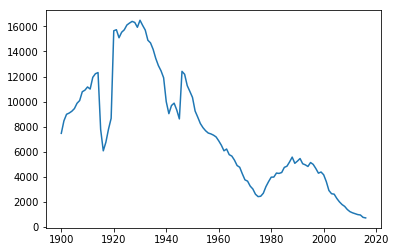

In [52]:
mon_prenom_evolution = mon_prenom_evolution['nombre']
mon_prenom_evolution = mon_prenom_evolution.drop('XXXX')
plt.plot(mon_prenom_evolution)
plt.show()

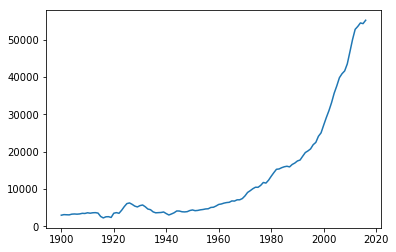

In [53]:
prenoms_rares = data.query('preusuel=="_PRENOMS_RARES"')
prenoms_rares_evolution = prenoms_rares.groupby('annais').sum()
prenoms_rares_evolution = prenoms_rares_evolution['nombre']
prenoms_rares_evolution = prenoms_rares_evolution.drop('XXXX')
plt.plot(prenoms_rares_evolution)
plt.show()

## III- 4) Le top 10 de mon annee

In [54]:
mon_annee = data.query('annais=="2016"')
mon_annee = mon_annee.groupby('preusuel').sum()
mon_annee = mon_annee.sort_values(by = 'nombre', ascending = False)
mon_annee.head(10)

,sexe,nombre
preusuel,,
_PRENOMS_RARES,288,55183
GABRIEL,96,5869
JULES,96,5028
EMMA,186,4725
ADAM,93,4654
LUCAS,95,4585
LOUIS,96,4570
RAPHAËL,93,4383
LOUISE,190,4174


# IV - Tremblements de terre en Métropole

## IV - 1) Analyse du DataFrame

In [55]:
import matplotlib.pyplot as plt
import pandas
data = pandas.read_csv('SeismesMetropole2018.csv', sep=';')
data.tail()

,heure,latitude,longitude,magnitude,ville,type
1309,2018-01-01T07:26:50.643000+00:00,45.451,6.255,1.7,Saint-Jean-de-Maurienne,earthquake
1310,2018-01-01T07:25:53.743000+00:00,-4.594,102.457,5.3,Palembang,None
1311,2018-01-01T02:21:15.247000+00:00,44.290,7.332,1.1,Cuneo,earthquake
1312,2018-01-01T02:07:24.608000+00:00,44.684,6.723,1.7,Briançon,earthquake
1313,2018-01-01T01:17:41.525000+00:00,45.442,6.383,2.6,Albertville,earthquake


In [56]:
data.count()

heure        1314
latitude     1314
longitude    1314
magnitude    1314
ville        1314
type         1314
dtype: int64

In [57]:
data['type'].value_counts()


earthquake                    836
quarry blast                  264
None                          202
explosion                       9
snow avalanche                  2
induced or triggered event      1
Name: type, dtype: int64

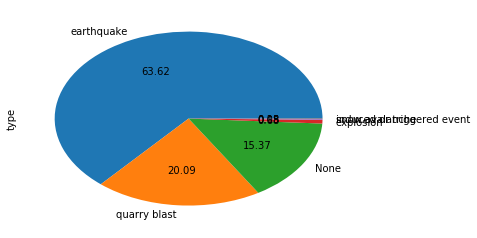

In [58]:
seisme_type=data['type'].value_counts()
seisme_type.plot.pie(autopct='%.2f')
plt.show()

In [59]:
tremblement = data.query('type == "earthquake"')
tremblement.head()
tremblement.tail()

,heure,latitude,longitude,magnitude,ville,type
1308,2018-01-01T07:40:57.217000+00:00,45.414,6.295,2.1,Saint-Jean-de-Maurienne,earthquake
1309,2018-01-01T07:26:50.643000+00:00,45.451,6.255,1.7,Saint-Jean-de-Maurienne,earthquake
1311,2018-01-01T02:21:15.247000+00:00,44.290,7.332,1.1,Cuneo,earthquake
1312,2018-01-01T02:07:24.608000+00:00,44.684,6.723,1.7,Briançon,earthquake
1313,2018-01-01T01:17:41.525000+00:00,45.442,6.383,2.6,Albertville,earthquake


In [60]:
tremblement['magnitude'].describe()


count    836.000000
mean       1.637679
std        0.654732
min        0.300000
25%        1.300000
50%        1.500000
75%        1.900000
max        7.100000
Name: magnitude, dtype: float64

In [61]:
magnitude3 = tremblement.query('magnitude >= 2')
len(magnitude3)/836

0.21291866028708134

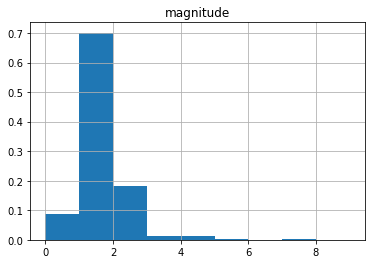

In [62]:
tremblement.hist(column = 'magnitude', bins = range(0,10,1), normed = True)
plt.show()

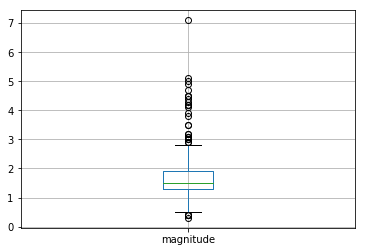

In [63]:
tremblement.boxplot(column = 'magnitude')
plt.show()

In [64]:
tremblement_ordre = tremblement.sort_values(by='magnitude', ascending = False)
tremblement_ordre.head()

,heure,latitude,longitude,magnitude,ville,type
792,2018-01-23T09:31:41.967000+00:00,56.079,-149.141,7.1,Anchorage,earthquake
314,2018-02-06T14:27:21.254000+00:00,36.355,5.240,5.1,Bejaïa,earthquake
301,2018-02-06T21:53:56.788000+00:00,38.028,73.039,5.0,Fayzabad,earthquake
1010,2018-01-15T11:51:41.003000+00:00,38.957,-7.924,4.9,Évora,earthquake
122,2018-02-12T03:08:31.430000+00:00,46.630,-0.632,4.7,Bressuire,earthquake


## IV - 2) Carte interactive

In [65]:
import folium

x_moy = tremblement['latitude'].mean()
y_moy = tremblement['longitude'].mean()

# creation d'une carte avec pour centre le point (x_moy,y_moy)
carte = folium.Map(location=[x_moy,y_moy],zoom_start=6,tiles='Stamen Terrain')

for k in tremblement.index.values:
    latitude = tremblement.loc[k,'latitude']
    longitude = tremblement.loc[k,'longitude']
    magnitude = tremblement.loc[k,'magnitude']
    if magnitude >= 2 and magnitude <3:
        point = folium.Marker([latitude,longitude],popup=str(magnitude),icon=folium.Icon(color='green'))
        carte.add_child(point)
    if magnitude >= 3 and magnitude < 4:
        point = folium.Marker([latitude,longitude],popup=str(magnitude),icon=folium.Icon(color='orange'))
        carte.add_child(point)
    if  magnitude >= 4:
        point = folium.Marker([latitude,longitude],popup=str(magnitude),icon=folium.Icon(color='red'))
        carte.add_child(point)
carte